In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'

In [313]:
df_data = pd.read_csv('/Users/unchil/Downloads/20240730133403.csv')
df_data.head()

,동별(1),2014. 01,2014. 01.1,2014. 01.2,2014. 01.3,2014. 01.4,2014. 02,2014. 02.1,2014. 02.2,2014. 02.3,...,2024. 06,2024. 06.1,2024. 06.2,2024. 06.3,2024. 06.4,2023,2023.1,2023.2,2023.3,2023.4
0,동별(1),전체세대,1인세대,2인세대,3인세대,4인세대,전체세대,1인세대,2인세대,3인세대,...,전체세대,1인세대,2인세대,3인세대,4인세대,전체세대,1인세대,2인세대,3인세대,4인세대
1,합계,4182556,1509520,811779,781253,822068,4188621,1516026,812868,781694,...,4486014,2010450,1005159,747299,566364,4469417,1988235,998390,746450,575701


In [335]:
data_columns = df_data.columns[1:-5]
df_row = df_data.loc[1:,data_columns]
df_row

,2014. 01,2014. 01.1,2014. 01.2,2014. 01.3,2014. 01.4,2014. 02,2014. 02.1,2014. 02.2,2014. 02.3,2014. 02.4,...,2024. 05,2024. 05.1,2024. 05.2,2024. 05.3,2024. 05.4,2024. 06,2024. 06.1,2024. 06.2,2024. 06.3,2024. 06.4
1,4182556,1509520,811779,781253,822068,4188621,1516026,812868,781694,820991,...,4486224,2009509,1004306,747485,567842,4486014,2010450,1005159,747299,566364


In [336]:
df_seq = df_row.melt()
df_seq

,variable,value
0,2014. 01,4182556
1,2014. 01.1,1509520
2,2014. 01.2,811779
3,2014. 01.3,781253
4,2014. 01.4,822068
...,...,...
625,2024. 06,4486014
626,2024. 06.1,2010450
627,2024. 06.2,1005159
628,2024. 06.3,747299


In [337]:
def make_data(data):
    index = []
    personHousehold_all = []
    personHousehold_1 = []
    personHousehold_2 = []
    personHousehold_3 = []
    personHousehold_4 = []
    
    
    for i in range(len(data)):    
        row = data.loc[i]
        date = row.variable.replace(' ', '').split('.')
        
        if len(date) == 2:
            personHousehold_all.append(row.value)
            index.append(datetime.strptime(f'{date[0]}-{date[1]}' , '%Y-%m'))
        else:
            if date[2]== '1':
                personHousehold_1.append(row.value)
            elif date[2]== '2':
                personHousehold_2.append(row.value)
            elif date[2]== '3':
                personHousehold_3.append(row.value)
            elif date[2]== '4':
                personHousehold_4.append(row.value)

    
    df_result = pd.DataFrame( data = {
         '전체세대':personHousehold_all,
         '1인세대':personHousehold_1,
         '2인세대':personHousehold_2,
         '3인세대':personHousehold_3,
         '4인세대':personHousehold_4 },
     index = index )

    return df_result.astype('int64')
            

In [338]:
df_ph = make_data(df_seq)
df_ph

,전체세대,1인세대,2인세대,3인세대,4인세대
2014-01-01,4182556,1509520,811779,781253,822068
2014-02-01,4188621,1516026,812868,781694,820991
2014-03-01,4190331,1518916,812578,781759,820758
2014-04-01,4189778,1518936,813507,781767,819530
2014-05-01,4189440,1517927,815583,782076,818461
...,...,...,...,...,...
2024-02-01,4480607,1999999,1001422,747237,572803
2024-03-01,4485819,2006402,1002533,747582,570896
2024-04-01,4486137,2008104,1003480,747406,569433
2024-05-01,4486224,2009509,1004306,747485,567842


In [339]:
df_ph.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126 entries, 2014-01-01 to 2024-06-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   전체세대    126 non-null    int64
 1   1인세대    126 non-null    int64
 2   2인세대    126 non-null    int64
 3   3인세대    126 non-null    int64
 4   4인세대    126 non-null    int64
dtypes: int64(5)
memory usage: 5.9 KB


In [340]:
df_ph['>4인세대'] = df_ph.전체세대 - (df_ph['1인세대'] + df_ph['2인세대'] + df_ph['3인세대'] + df_ph['4인세대'])
df_ph

,전체세대,1인세대,2인세대,3인세대,4인세대,>4인세대
2014-01-01,4182556,1509520,811779,781253,822068,257936
2014-02-01,4188621,1516026,812868,781694,820991,257042
2014-03-01,4190331,1518916,812578,781759,820758,256320
2014-04-01,4189778,1518936,813507,781767,819530,256038
2014-05-01,4189440,1517927,815583,782076,818461,255393
...,...,...,...,...,...,...
2024-02-01,4480607,1999999,1001422,747237,572803,159146
2024-03-01,4485819,2006402,1002533,747582,570896,158406
2024-04-01,4486137,2008104,1003480,747406,569433,157714
2024-05-01,4486224,2009509,1004306,747485,567842,157082


<Axes: >

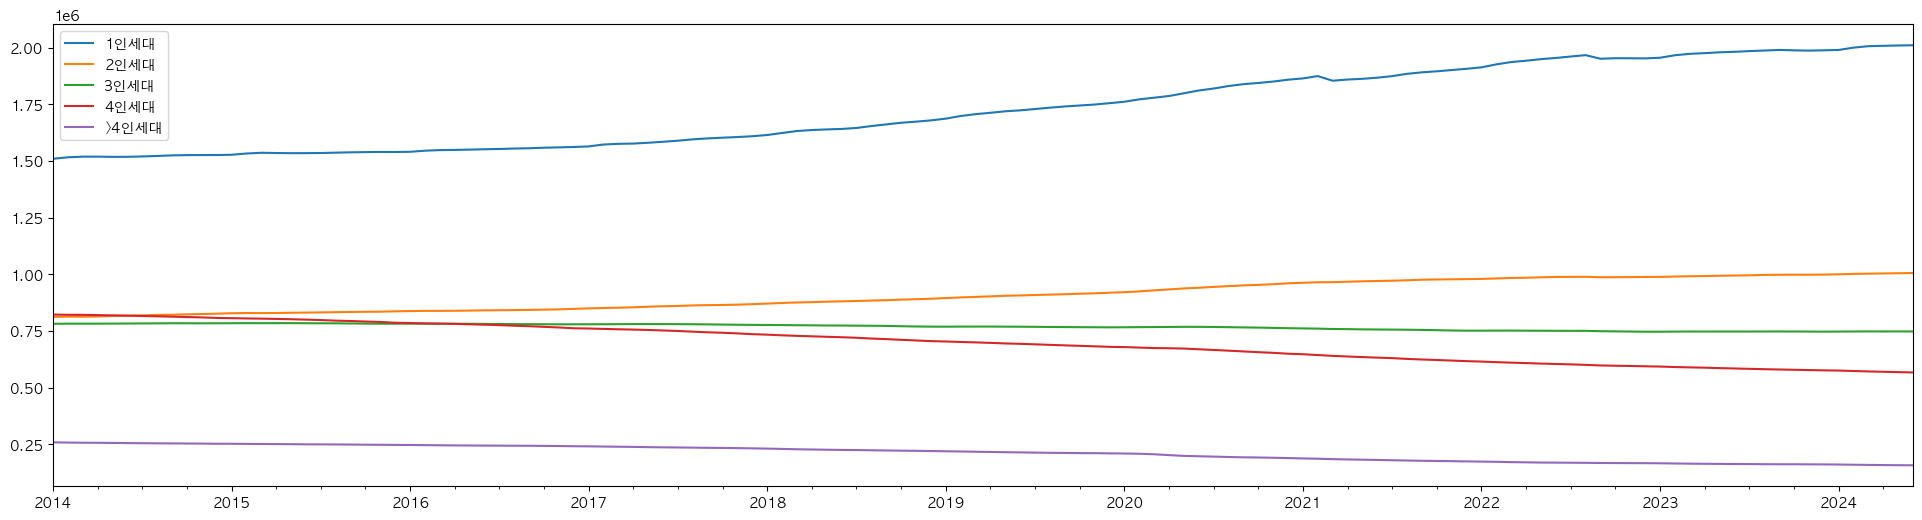

In [341]:
df_ph[['1인세대', '2인세대', '3인세대', '4인세대', '>4인세대']].plot(figsize=(24,6))

<Axes: >

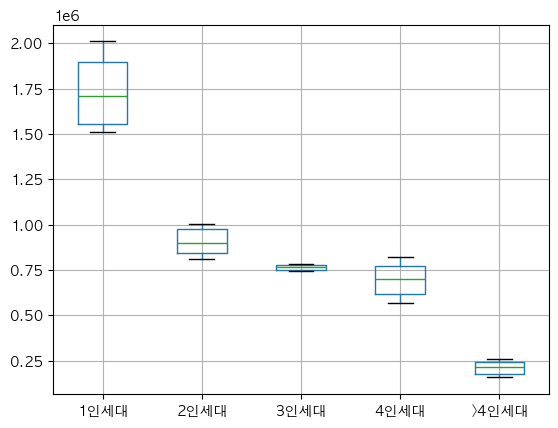

In [342]:
df_ph[['1인세대', '2인세대', '3인세대', '4인세대', '>4인세대']].boxplot()

<Axes: ylabel='count'>

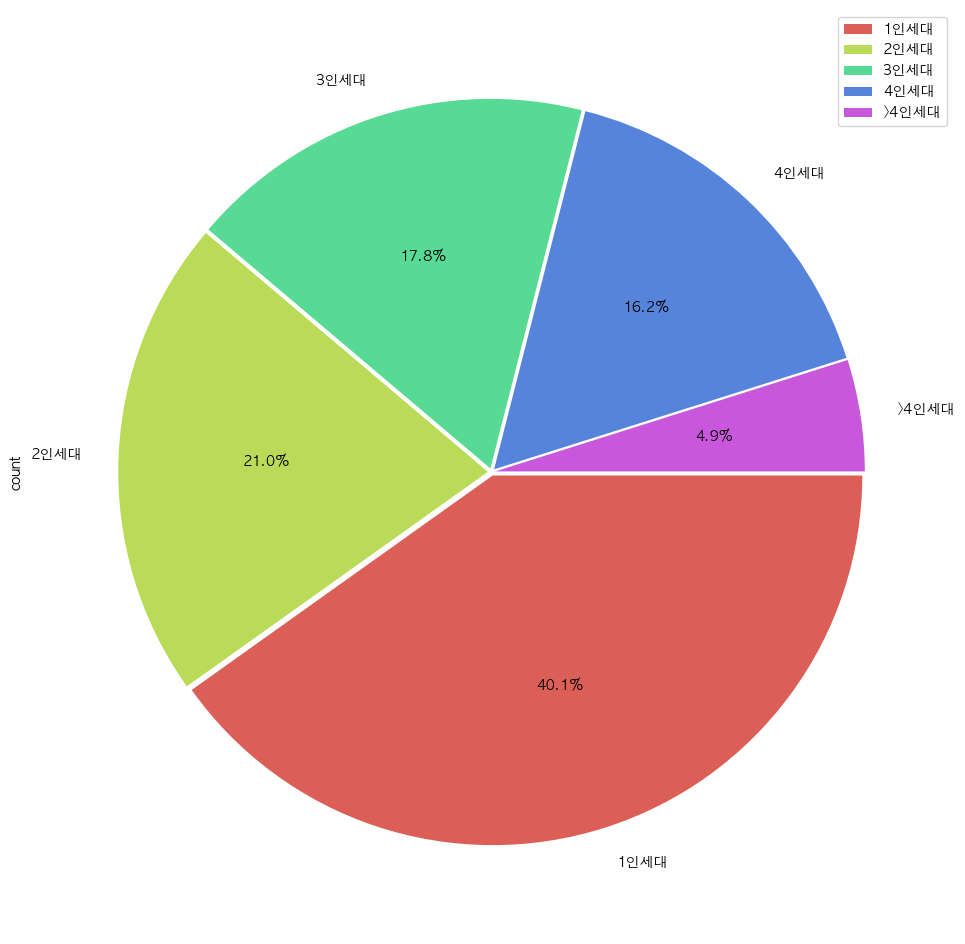

In [343]:
a = pd.DataFrame( data = df_ph[['1인세대', '2인세대', '3인세대', '4인세대', '>4인세대']].sum() , columns= ['count'])
palette = sns.color_palette('hls', 5)
explode = [0.01] * 5
a.plot.pie(y = 'count' ,figsize=(12, 12),  autopct='%.1f%%', counterclock=False, explode=explode, colors=palette)